In [1]:
import numpy as np
import pandas as pd

import seaborn as sns  
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["font.sans-serif"]=["SimHei"]#展示中文字体
mpl.rcParams["axes.unicode_minus"]=False#处理负刻度值

In [2]:
data_raw = pd.read_excel("data/附件1-商家历史出货量表.xlsx")

In [100]:
data = data_raw
data.head()

,seller_no,product_no,warehouse_no,date,qty
0,seller_19,product_448,wh_30,2023-05-09,10
1,seller_19,product_448,wh_30,2023-04-17,14
2,seller_19,product_448,wh_30,2023-01-09,2
3,seller_19,product_448,wh_30,2023-01-20,1
4,seller_19,product_448,wh_30,2023-02-13,22


In [101]:
product_type_raw = pd.read_excel("data/附件2-商品信息表.xlsx")
storage_type_raw = pd.read_excel("data/附件4-仓库信息表.xlsx")
storage_type_raw.head()

,warehouse_no,warehouse _category,warehouse _region
0,wh_1,中心仓,华东
1,wh_10,区域仓,华北
2,wh_11,区域仓,华中
3,wh_12,区域仓,华北
4,wh_13,区域仓,华南


In [102]:
product_type = product_type_raw.set_index("product_no")
storage_type = storage_type_raw.drop_duplicates(keep='first').set_index("warehouse_no")
storage_type.head()

,warehouse _category,warehouse _region
warehouse_no,,
wh_1,中心仓,华东
wh_10,区域仓,华北
wh_11,区域仓,华中
wh_12,区域仓,华北
wh_13,区域仓,华南


- 仓库数据中wh_29、wh_38数据重复，只保留一个

# 数据分类

- 根据商品类型分类
- 根据地区分类
- 根据商家体量分类
- 根据变化趋势分类

In [103]:
product = data.set_index("product_no")[["warehouse_no","date","qty"]]
product.head()

,warehouse_no,date,qty
product_no,,,
product_448,wh_30,2023-05-09,10
product_448,wh_30,2023-04-17,14
product_448,wh_30,2023-01-09,2
product_448,wh_30,2023-01-20,1
product_448,wh_30,2023-02-13,22


In [104]:
product["type"] = product_type.loc[product.index]["category1"]
product["region"] = storage_type.loc[product["warehouse_no"]]["warehouse _region"].values
product.head()

,warehouse_no,date,qty,type,region
product_no,,,,,
product_448,wh_30,2023-05-09,10,手机通讯,华南
product_448,wh_30,2023-04-17,14,手机通讯,华南
product_448,wh_30,2023-01-09,2,手机通讯,华南
product_448,wh_30,2023-01-20,1,手机通讯,华南
product_448,wh_30,2023-02-13,22,手机通讯,华南


## 商品类型 

In [112]:
import random
count = 10
name = []
type_corr = []

for idx, df in product.groupby("type"):

    qtys = df.groupby(["product_no","date"]).mean()
    qtys = qtys.unstack(level=0).fillna(0)
    
    clist = qtys.columns.tolist()
    rand_colm = random.sample(clist, min(count, len(clist)))
    
    name += [idx]
    type_corr += [qtys[rand_colm].corr().values.mean()]

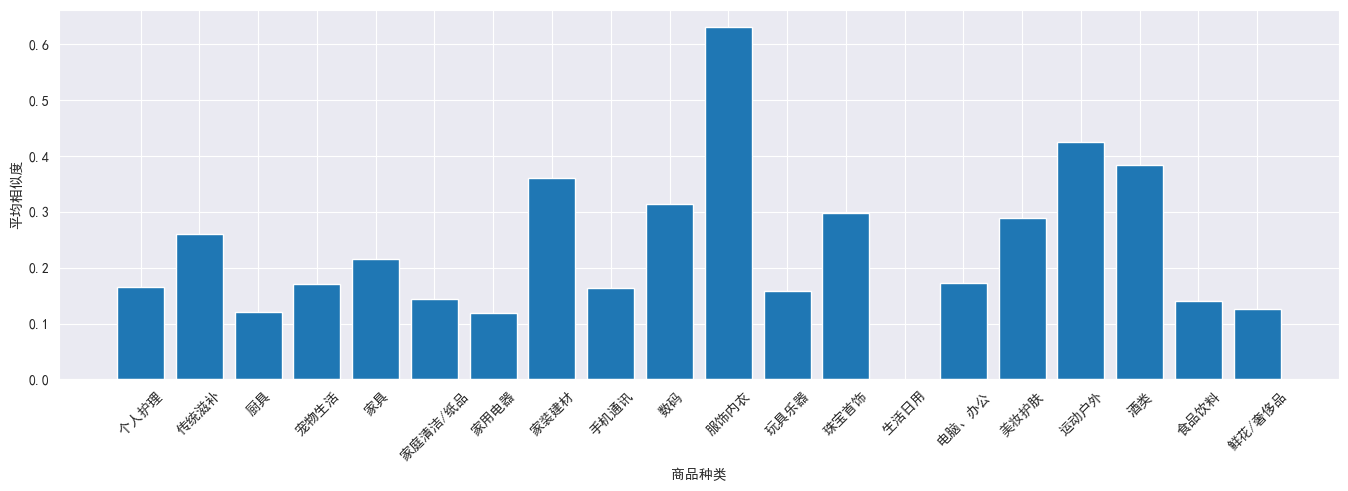

In [113]:
plt.bar(name, type_corr)

plt.xticks(rotation=45)

plt.ylabel('平均相似度')
plt.xlabel('商品种类')

plt.subplots_adjust(left=0, right=2)
plt.show()

## 地区 

In [114]:
count = 10

name = []
region_corr = []

for idx, df in product.groupby("region"):

    qtys = df.groupby(["product_no","date"]).mean()
    qtys = qtys.unstack(level=0).fillna(0)
    
    clist = qtys.columns.tolist()
    rand_colm = random.sample(clist, min(count, len(clist)))
    
    name += [idx]
    region_corr += [qtys[rand_colm].corr().values.mean()]

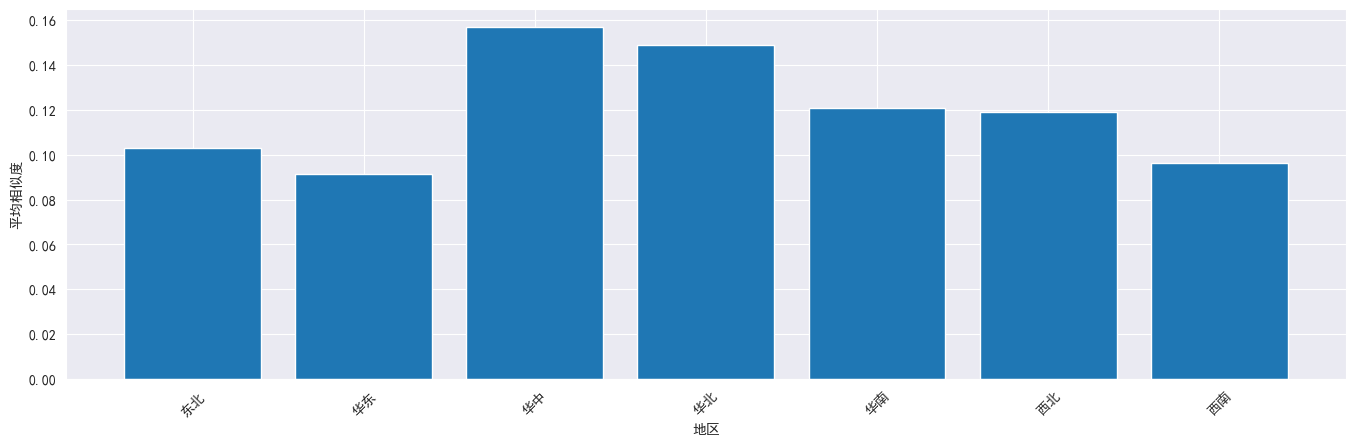

In [115]:
plt.bar(name, region_corr)

plt.xticks(rotation=45)

plt.ylabel('平均相似度')
plt.xlabel('地区')

plt.subplots_adjust(left=0, right=2)
plt.show()

## 随机对照

In [116]:
count = 10
categ = 10

index_labels = product.index.values
random.shuffle(index_labels)

grouped_index = [index_labels[i:i + count] for i in range(0, categ*count, count)]

In [117]:
name = []
random_corr = []

grouped_dfs = (product.loc[group] for group in grouped_index)

for i, df in enumerate(grouped_dfs):
    name += [i]
    df = df.groupby(["product_no","date"]).mean().unstack(level=0).fillna(0)
    
    random_corr += [df.corr().values.mean()]

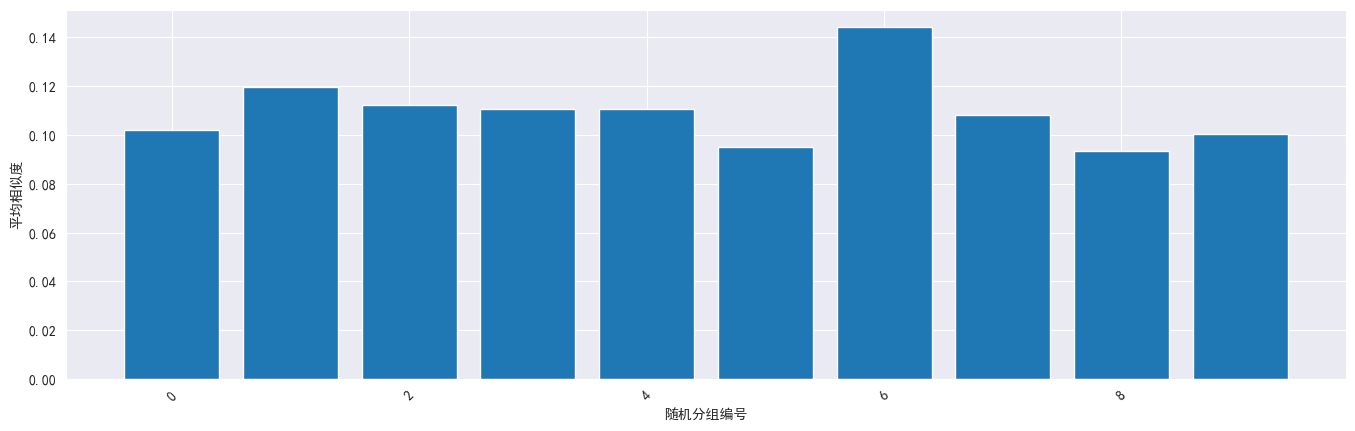

In [118]:
plt.bar(name, random_corr)

plt.xticks(rotation=45)

plt.ylabel('平均相似度')
plt.xlabel('随机分组编号')

plt.subplots_adjust(left=0, right=2)
plt.show()